In [1]:
import pandas as pd 
import numpy as np

In [10]:
df=pd.read_csv(r'C:\Users\mared\Desktop\eda python\Netflix_movies_and_tv_shows_clustering.csv\Netflix_movies.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df.shape

(7787, 12)

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [15]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
n_df=df.dropna(subset=['date_added','rating'])

In [26]:
n_df['director'].fillna('unknown',inplace=True)
n_df['cast'].fillna('unknown',inplace=True)
n_df['country'].fillna('unknown',inplace=True)

C:\Users\mared\AppData\Local\Temp\ipykernel_15296\3771630397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['director'].fillna('unknown',inplace=True)
C:\Users\mared\AppData\Local\Temp\ipykernel_15296\3771630397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_df['cast'].fillna('unknown',inplace=True)
C:\Users\mared\AppData\Loca

In [30]:
n_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [38]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
 12  month         7770 non-null   object
dtypes: int64(1), object(12)
memory usage: 849.8+ KB


In [37]:
n_df['month']=n_df['date_added'].str.split(' ',n=1,expand=True)[0]

C:\Users\mared\AppData\Local\Temp\ipykernel_15296\3302925008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['month']=n_df['date_added'].str.split(' ',n=1,expand=True)[0]


In [42]:
import matplotlib.pyplot as ply
import seaborn as sns

([<matplotlib.patches.Wedge at 0x11cec3c3ce0>,
 [Text(-0.6222219335963193, 0.9071052118424069, 'Movie'),
  Text(0.6222219335963195, -0.9071052118424067, 'TV Show')])

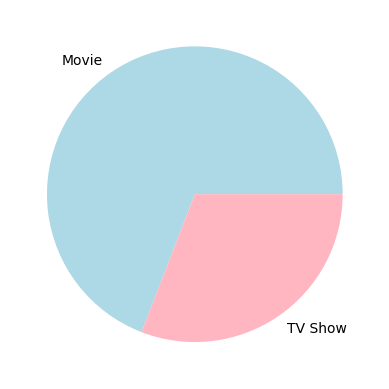

In [49]:
# univariate analysis
value=n_df['type'].value_counts()
ply.pie(value,labels=value.index,colors = ['lightblue', 'lightpink'])

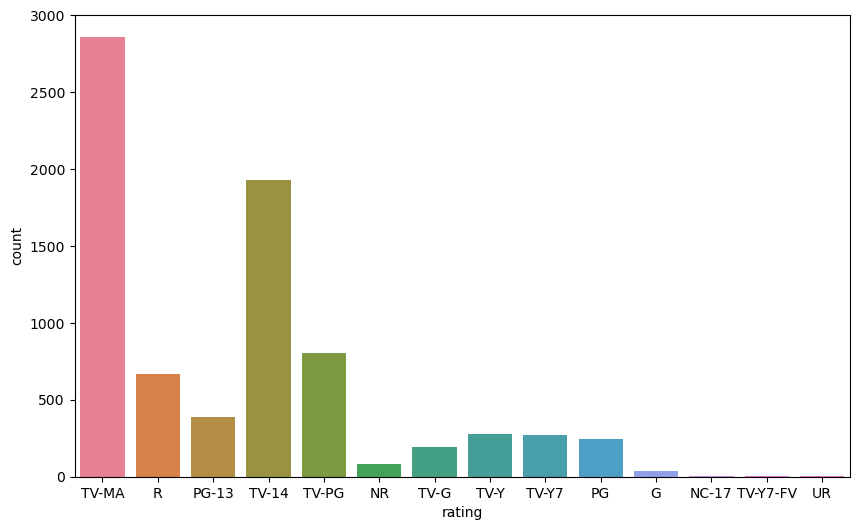

In [60]:
ply.figure(figsize=(10,6))
sns.countplot(x='rating',data=n_df,hue='rating')
ply.show()

In [78]:
content=n_df['country'].value_counts().head(10).reset_index()
content

,country,count
0,United States,2546
1,India,923
2,unknown,505
3,United Kingdom,396
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


Text(0.5, 1.0, 'Top 10 countries produces content')

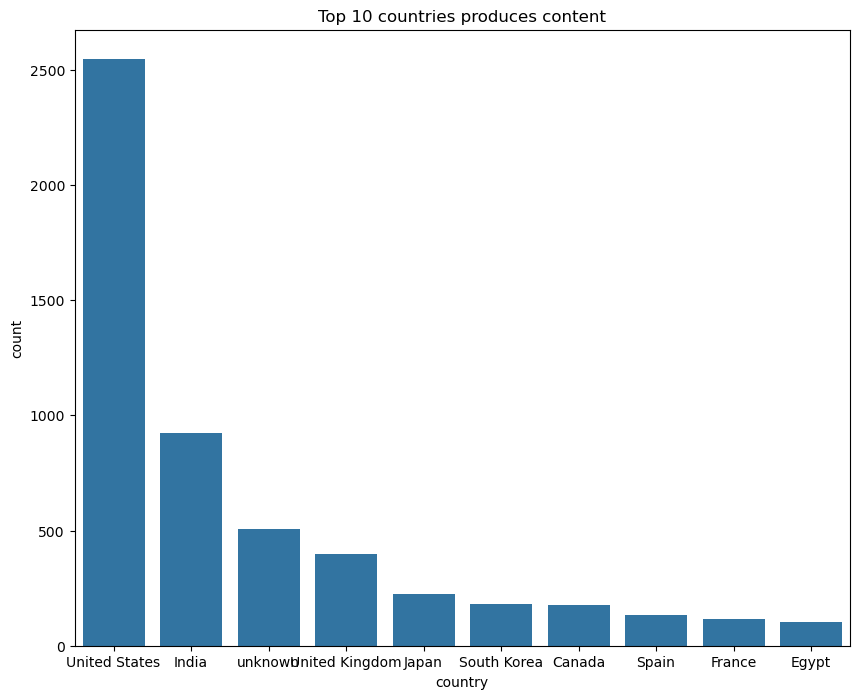

In [85]:
ply.figure(figsize=(10,8))
sns.barplot(x='country',y='count',data=content)
ply.title("Top 10 countries produces content")

In [100]:
year=n_df['release_year'].value_counts().head(10).reset_index()

Text(0.5, 1.0, 'Movie Release Trends by Year')

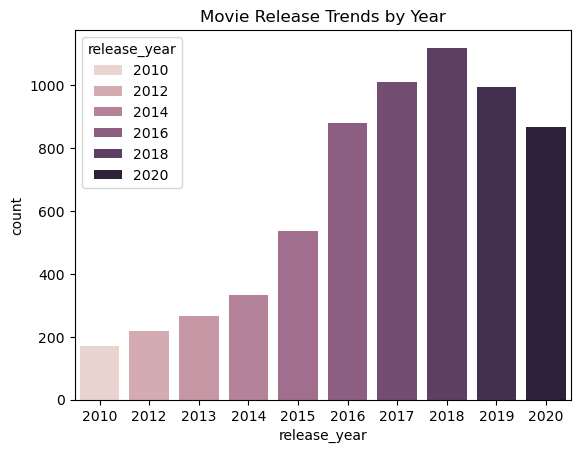

In [104]:
sns.barplot(x='release_year',y='count',data=year,hue='release_year')
ply.title('Movie Release Trends by Year')

Text(0.5, 1.0, "Month Wise Trend's")

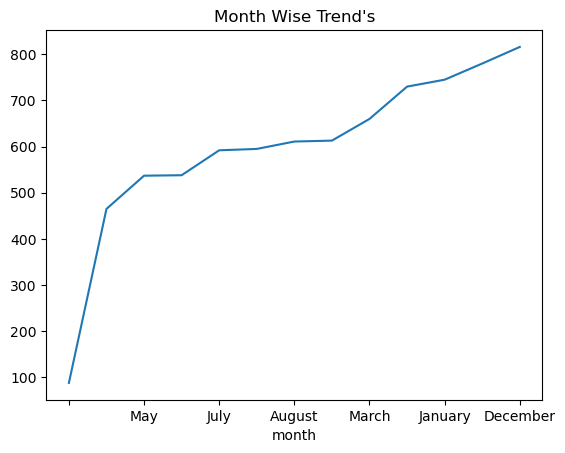

In [143]:
n_df['month'].value_counts().sort_values().plot(kind='line')
ply.title("Month Wise Trend's")

In [152]:
tv=n_df[n_df['type']=='TV Show']

Text(0.5, 1.0, 'top 5 yearwise tv shows added to netflix')

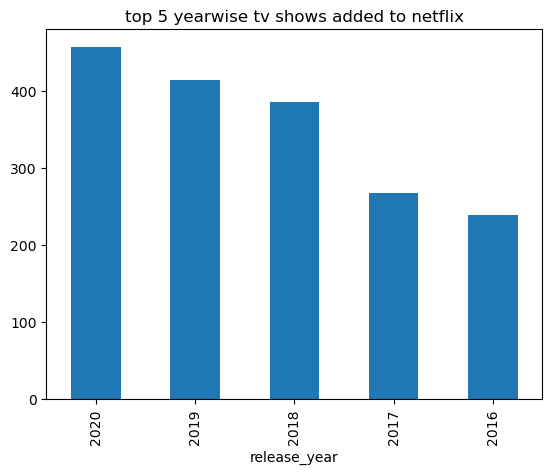

In [178]:
tv.groupby('release_year')['type'].size().sort_values(ascending=False).head(5).plot(kind='bar')
ply.title("top 5 yearwise tv shows added to netflix")

Text(0.5, 1.0, 'top 5 yearwise movies added to netflix')

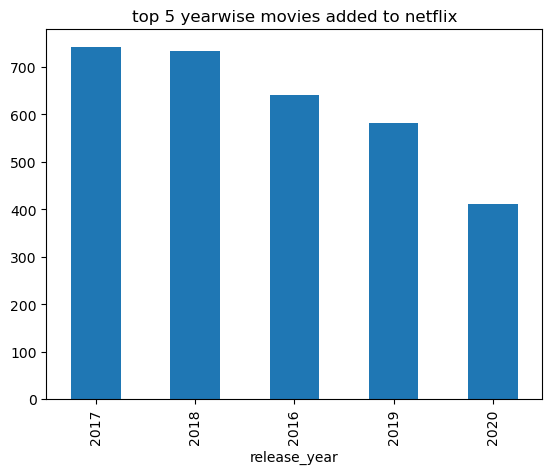

In [177]:
movies=n_df[n_df['type'] == 'Movie']
movies.groupby('release_year').size().sort_values(ascending=False).head(5).plot(kind='bar')
ply.title("top 5 yearwise movies added to netflix")

In [237]:
c_2020=n_df[n_df['release_year']==2020]
data5=c_2020['country'].value_counts().head(5).reset_index()
data5


,country,count
0,United States,332
1,India,66
2,unknown,63
3,United Kingdom,47
4,South Korea,30


<Axes: xlabel='country', ylabel='count'>

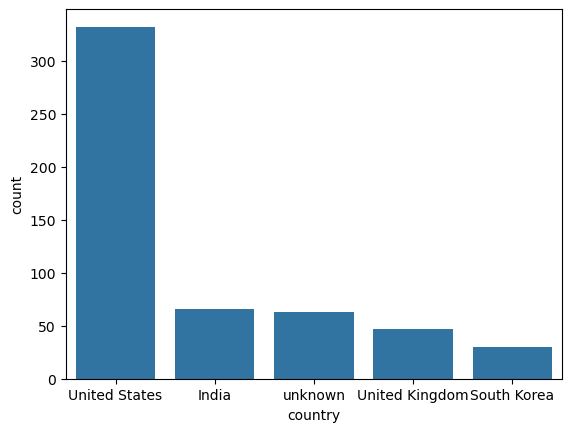

In [238]:
sns.barplot(x='country',y='count',data=data5)

In [239]:
n_df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


<Axes: ylabel='release_year'>

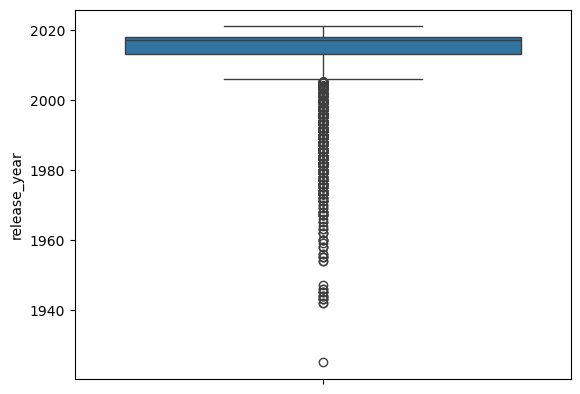

In [245]:
sns.boxplot(n_df['release_year'])